In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load dataset from CSV file
BostonTrain = pd.read_csv('boston_train (1).csv')

In [3]:
# Drop irrelevant columns
BostonTrain.drop('ID', axis=1, inplace=True)

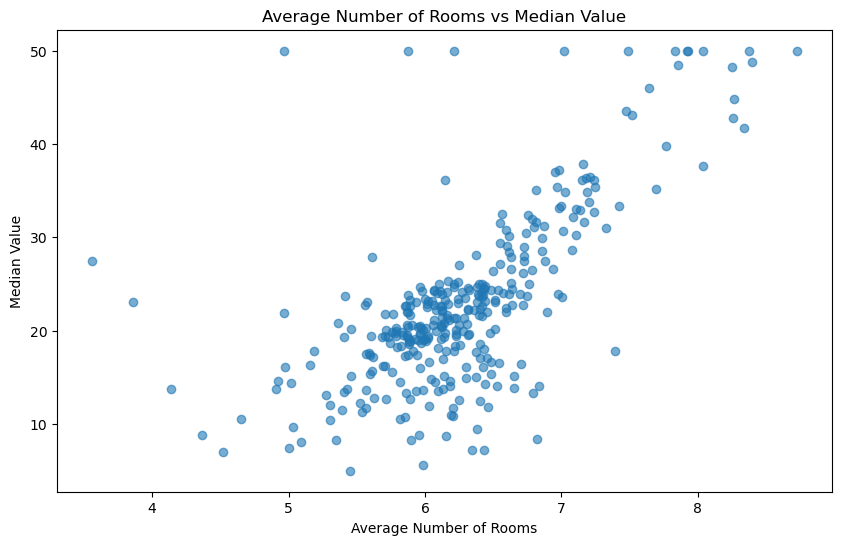

In [4]:
# Plot the scatter plot for 'rm' vs 'medv'
plt.figure(figsize=(10, 6))
plt.scatter(BostonTrain['rm'], BostonTrain['medv'], alpha=0.6)
plt.title('Average Number of Rooms vs Median Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value')
plt.show()

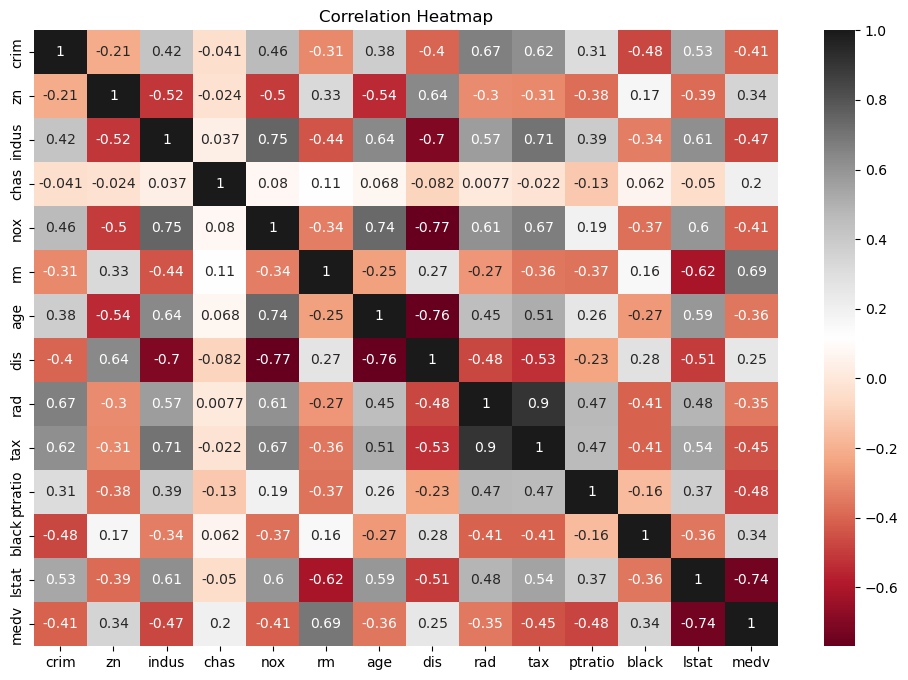

In [5]:
# Plot heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(BostonTrain.corr(), cmap='RdGy', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Train-test split
X = BostonTrain.drop('medv', axis=1)
y = BostonTrain['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [7]:
# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_predictions = lm.predict(X_test)

In [8]:
# Evaluate Linear Regression
lm_mae = mean_absolute_error(y_test, lm_predictions)
lm_mse = mean_squared_error(y_test, lm_predictions)
lm_rmse = np.sqrt(lm_mse)
print('Linear Regression MAE:', lm_mae)
print('Linear Regression MSE:', lm_mse)
print('Linear Regression RMSE:', lm_rmse)

Linear Regression MAE: 3.4125482966558938
Linear Regression MSE: 19.64765514515701
Linear Regression RMSE: 4.43256755675049


In [9]:
# Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=15, verbose=1, validation_split=0.05)

Epoch 1/15
6/6 [==============================] - 1s 46ms/step - loss: 611.8658 - mae: 22.9187 - val_loss: 288.0303 - val_mae: 16.6220
Epoch 2/15
6/6 [==============================] - 0s 8ms/step - loss: 582.7935 - mae: 22.2433 - val_loss: 265.1496 - val_mae: 15.8885
Epoch 3/15
6/6 [==============================] - 0s 8ms/step - loss: 544.3259 - mae: 21.3513 - val_loss: 232.9764 - val_mae: 14.7913
Epoch 4/15
6/6 [==============================] - 0s 7ms/step - loss: 487.4110 - mae: 19.9705 - val_loss: 189.3263 - val_mae: 13.1632
Epoch 5/15
6/6 [==============================] - 0s 8ms/step - loss: 410.3629 - mae: 17.9619 - val_loss: 133.2705 - val_mae: 10.7117
Epoch 6/15
6/6 [==============================] - 0s 8ms/step - loss: 304.5240 - mae: 15.0418 - val_loss: 72.3414 - val_mae: 7.1740
Epoch 7/15
6/6 [==============================] - 0s 8ms/step - loss: 194.4285 - mae: 11.5174 - val_loss: 28.3004 - val_mae: 4.5296
Epoch 8/15
6/6 [==============================] - 0s 8ms/step - l

In [18]:
# Evaluation of the Neural Network
nn_predictions = model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = np.sqrt(nn_mse)
print('Neural Network MAE:', nn_mae)
print('Neural Network MSE:', nn_mse)
print('Neural Network RMSE:', nn_rmse)

5/5 [==============================] - 0s 1ms/step
Neural Network MAE: 3.756799070159001
Neural Network MSE: 21.89251468890099
Neural Network RMSE: 4.678943757826224


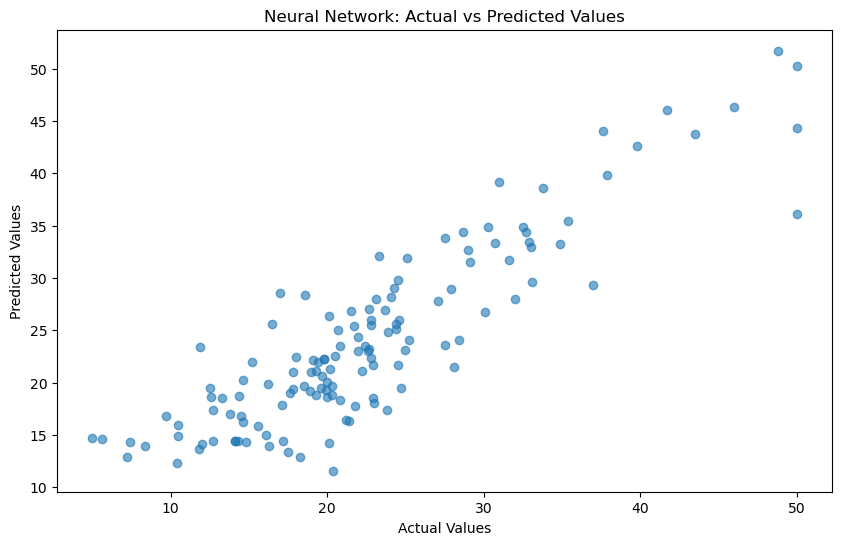

In [12]:
# Plot the predicted vs actual values for Neural Network
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, alpha=0.6)
plt.title('Neural Network: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()